## Instrucciones

**El examen puede ser realizado en grupo de tres personas, sin embargo, cada integrante crear y ejecutar las tareas de actualización en su GitHub.**

A continuación, se encuentran las instrucciones para el desarrollo del examen de nuestro curso de Ciencias de Datos para la Economía, el cual es parte de su portfolio.

**Objetivo**: Que el/la estudiante utilice las herramientas de Git y posteriormente publicar su primer proyecto de ciencias de datos en GitHub.

A continuación encontrará el dataset **ingresos.txt** en la carpeta de **Datos**, el cual contiene información de variables que buscan predecir los ingresos anuales de los encuestados utilizando datos de encuestas de 1990.

El dataset tiene 1.816 filas y 14 columnas. A continuación se describen las columnas:

- estatura: Unidad de medida centímetros
- peso: Unidad de medida kilogramos
- genero
- ingresos: en dólares
- etnia: etnia en EE.UU.
- educacion: en años
- educacion_madre: en años
- educacion_padre: en años
- Camina: Camina al trabajo
  - 1: Nunca
  - 2: Una vez al mes o menos
  - 3: Alrededor de dos veces al mes
  - 4: Alrededor de una veces a la semana
  - 5: Dos veces a la semana
  - 6: Tres veces a la semana
  - 7: Mas de tres veces a la semana
  - 8: Todos los días
- ejercicio: días de la semana que practica ejercicios
- fumador: Fuma 7 cigarros o más a la semana
  - 1: Si
  - 2: No
- tenso: días de la semana en dicho estado
- malhumorado: : días de la semana en dicho estado
- edad: en años



**Tareas solicitadas:**

Con el set de datos  ingresos.txt, debe realizar las siguientes actividades tanto en Python, Git y GitHub.:

- Crear carpeta donde va a trabajar su proyecto


- Inicializar su proyecto en git

  **`git init`**

- Crear un cuaderno de jupyter notebook, ya sea en colab o en su computador, para realizar su actividad.


- Crear un archivo con nombre README.md
touch README.md

- Describa su proyecto en el archivo README.md utilizando lenguaje markdown o latex. Puede usar como ayuda gráfica la página web indicada en las slices vistas en clase.

- Realizar un análisis descriptivos y visualización de datos: Debe realizar tareas tales como, descripción de los datos, transformaciones en caso de ser necesario, imputación, entro otras.
Debe guardar su proyecto y agregar el archivo a Git y comentarlo.

  **`crt + s`**

  **`git add`**

  **`git commit`**

- Crear un repositorio remoto en GitHub con el nombre Ciencias de Datos:

- Conectarse desde su computador al repositorio remoto. No olvide enlazar su computador.
git remote add origin https://github.com/nombre_usuario/nombre_repositorio.git

  Otra alternativa es realizar el proyecto usanod colab.

- Crear rama principal en su computador

  **`git branch -M main`**

- Agregar cuaderno de jupyter a repositorio remoto

  **`git push -u origin main`**

- Crear nueva rama para la segunda parte del Proyecto.

  **`git branch`**

- Moverse a nueva rama para la segunda parte del Proyecto.

  **`git checkout`**

- Continuar con su tarea en jupyter notebook. Ahora deberá aplicar reducción de dimensionalidad usando el algoritmo PCA. No es necesario que realice los test estadístico, solamente explicarlos e indicar que se cumplen los supuestos.
Debe guardar su proyecto y agregar el archivo a Git y comentarlo.

  **`crt + s`**

  **`git add`**

  **`git commit`**

- Moverse a la rama principal y realizar merge a la rama creada.

  **`git merge`**

- Actualizar la rama principal de su repositorio remoto y agregar la rama creada

  **`git push origin main`**

  **`git push origin nombre_rama_2`**


- Finalmente, cada integrante debe agregar la url de su proyecto en el aulavirtual

**Fecha Entrega: Domingo 15 de Diciembre de 2024, 23:00 hrs.**


**Nota 1:** Los códigos y pasos indicados deben ser utilizados como referencia, ya que es posible que algún paso o comandos no se hayan indicado.

**Nota 2**: En caso de que no pueda generar el proyecto con las ramas solicitadas, puede cargar el proyecto con un solo push.

In [1]:

!pip install pandas matplotlib seaborn scikit-learn


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
file_path = '/content/ingresos-1.txt'
df = pd.read_csv(file_path, sep='\t')

# Inspección inicial
print("Primeras filas del dataset:")
print(df.head())

print("\nResumen estadístico:")
print(df.describe())

print("\nInformación del dataset:")
print(df.info())


Primeras filas del dataset:
   estatura   peso     genero  ingresos   etnia  educacion  educacion_madre  \
0    187.96  95.25  masculino   50000.0  Blanco       16.0             16.0   
1    167.64  56.70   femenino   60000.0  Blanco       16.0             16.0   
2    162.56  57.15   femenino   30000.0  Blanco       16.0             16.0   
3    165.10  90.72   femenino   25000.0  Blanco       17.0             17.0   
4    160.02  49.90   femenino   50000.0   Other       16.0             16.0   

   educacion_padre  camina  ejercicio  fumador  tenso  malhumorado  edad  
0             16.0       3          3      2.0    0.0          0.0    45  
1             16.0       6          5      1.0    0.0          0.0    58  
2             16.0       8          1      2.0    1.0          1.0    29  
3              NaN       8          1      2.0    0.0          0.0    57  
4             16.0       5          6      2.0    0.0          0.0    91  

Resumen estadístico:
          estatura       

In [4]:
# Verificar valores faltantes
missing_values = df.isnull().sum()
print("\nValores faltantes por columna:")
print(missing_values)



Valores faltantes por columna:
estatura             0
peso                27
genero               0
ingresos             0
etnia                0
educacion            2
educacion_madre    244
educacion_padre    295
camina               0
ejercicio            0
fumador              1
tenso                1
malhumorado          1
edad                 0
dtype: int64


In [5]:
# Imputar valores faltantes para variables numéricas con la mediana
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nRevisión después de imputación:")
print(df.isnull().sum())



Revisión después de imputación:
estatura           0
peso               0
genero             0
ingresos           0
etnia              0
educacion          0
educacion_madre    0
educacion_padre    0
camina             0
ejercicio          0
fumador            0
tenso              0
malhumorado        0
edad               0
dtype: int64


<ipython-input-5-46a13bd3cf24>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-5-46a13bd3cf24>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [6]:
# Estadisticas
print("\nEstadísticas descriptivas para variables numéricas:")
print(df[numerical_cols].describe())

#
print("\nDistribución de valores para variables categóricas:")
for col in categorical_cols:
    print(f"{col}:\n{df[col].value_counts()}\n")



Estadísticas descriptivas para variables numéricas:
          estatura         peso       ingresos    educacion  educacion_madre  \
count  1816.000000  1816.000000    1816.000000  1816.000000      1816.000000   
mean    169.084835    70.855920   21147.296256    13.234031        13.526982   
std       9.732829    15.588549   22531.765123     2.555558         3.002357   
min     144.780000    36.290000       0.000000     2.000000         3.000000   
25%     162.560000    58.970000    6000.000000    12.000000        12.000000   
50%     167.640000    68.040000   16000.000000    12.000000        13.000000   
75%     175.895000    81.650000   27000.000000    15.000000        15.000000   
max     208.280000   155.130000  400000.000000    18.000000        99.000000   

       educacion_padre       camina    ejercicio      fumador        tenso  \
count      1816.000000  1816.000000  1816.000000  1816.000000  1816.000000   
mean         13.546256     5.303414     3.049009     1.745595     1.42

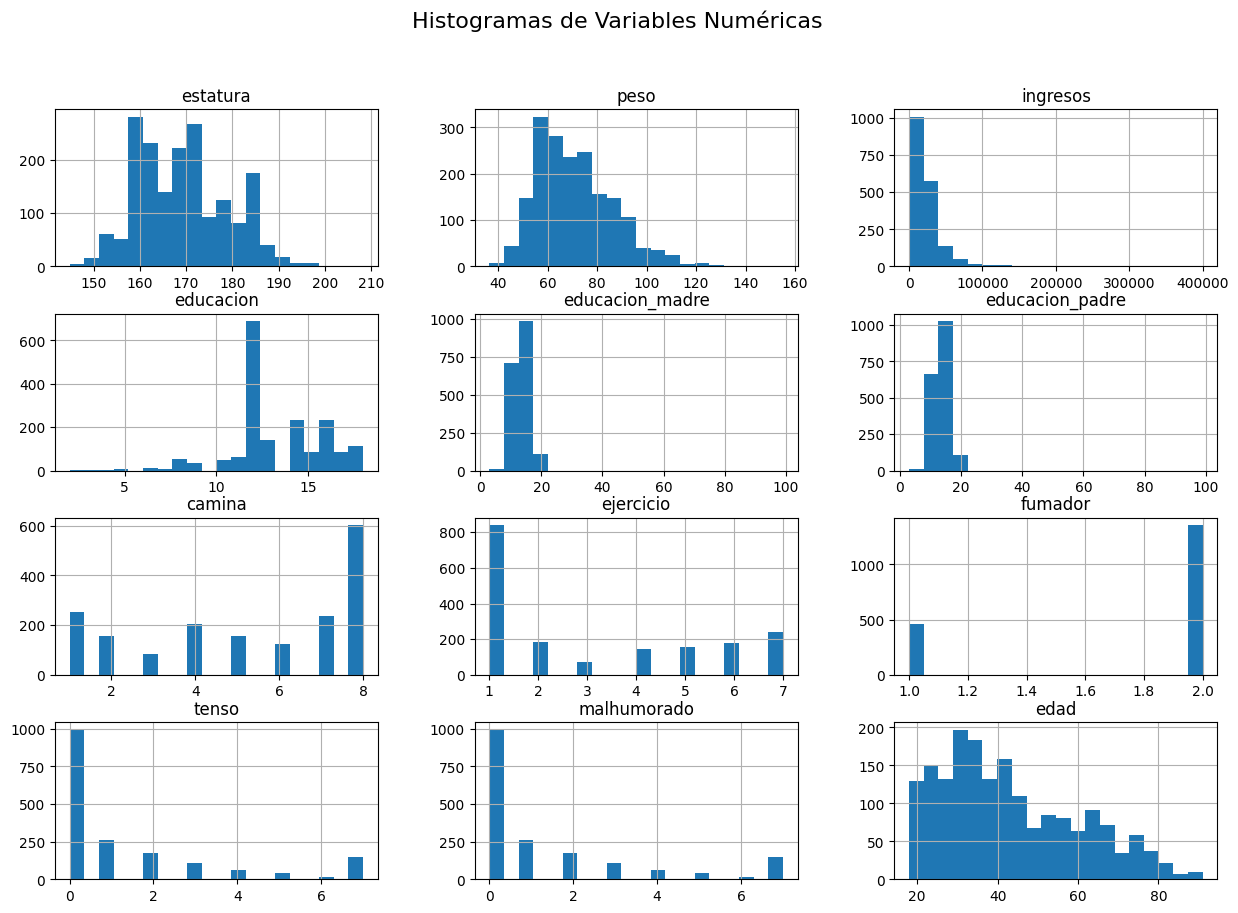

In [7]:
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Histogramas de Variables Numéricas", fontsize=16)
plt.show()


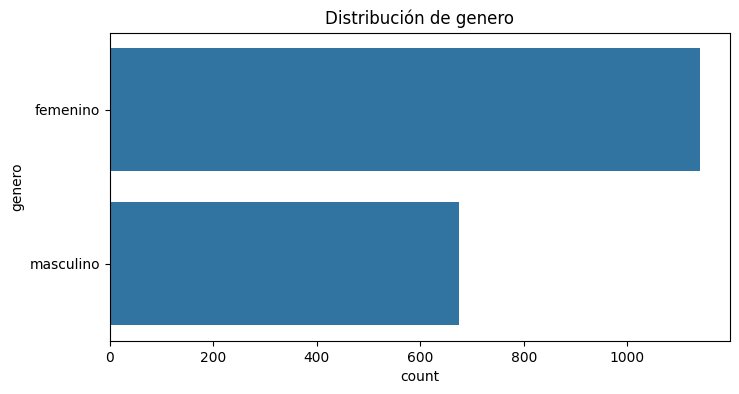

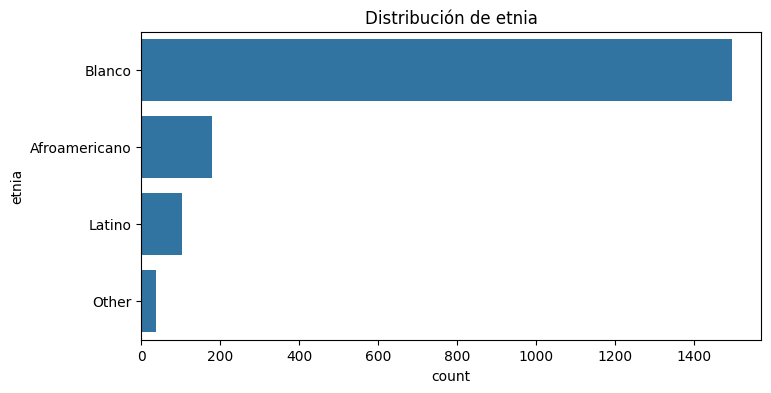

In [8]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.show()


In [10]:

print("Valores únicos en 'etnia':")
print(df['etnia'].unique())

# Transformar a variables dummy
df = pd.get_dummies(df, columns=['etnia'], drop_first=True)

# columnas transformadas
print("Columnas después de aplicar One-Hot Encoding a 'etnia':")
print(df.columns)

# Transformar a valores binarios
df['genero'] = df['genero'].map({'masculino': 1, 'femenino': 0})

# Verificar valores
print("\nValores únicos en 'genero' después de la transformación:")
print(df['genero'].unique())


Valores únicos en 'etnia':
['Blanco' 'Other' 'Afroamericano' 'Latino']
Columnas después de aplicar One-Hot Encoding a 'etnia':
Index(['estatura', 'peso', 'genero', 'ingresos', 'educacion',
       'educacion_madre', 'educacion_padre', 'camina', 'ejercicio', 'fumador',
       'tenso', 'malhumorado', 'edad', 'etnia_Blanco', 'etnia_Latino',
       'etnia_Other'],
      dtype='object')

Valores únicos en 'genero' después de la transformación:
[1 0]


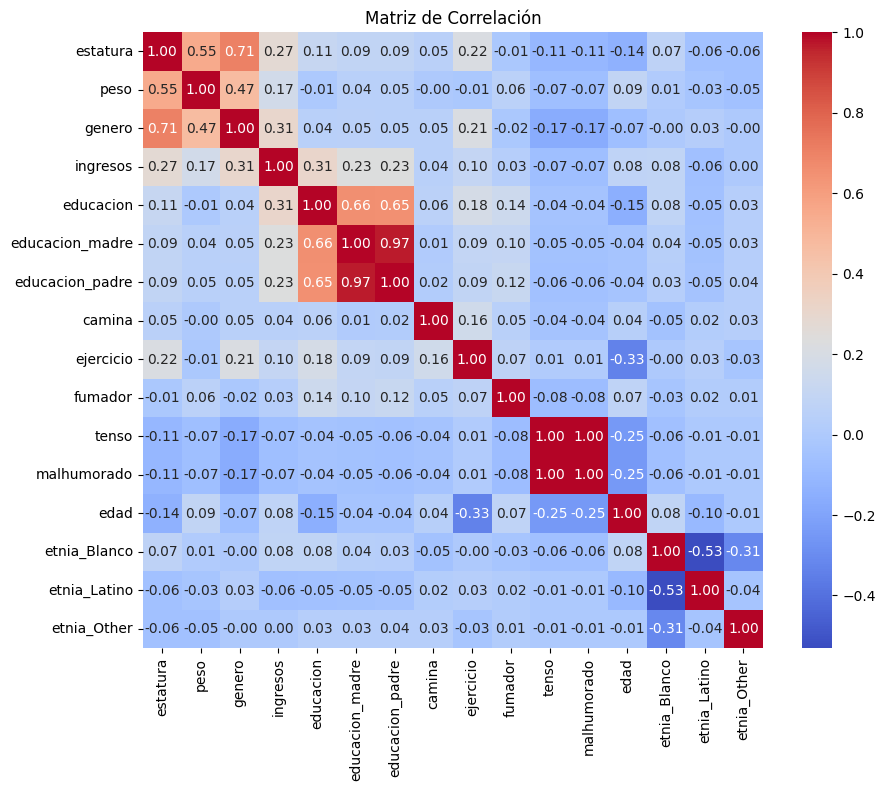

In [11]:
# Matriz de correlación
correlation_matrix = df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()


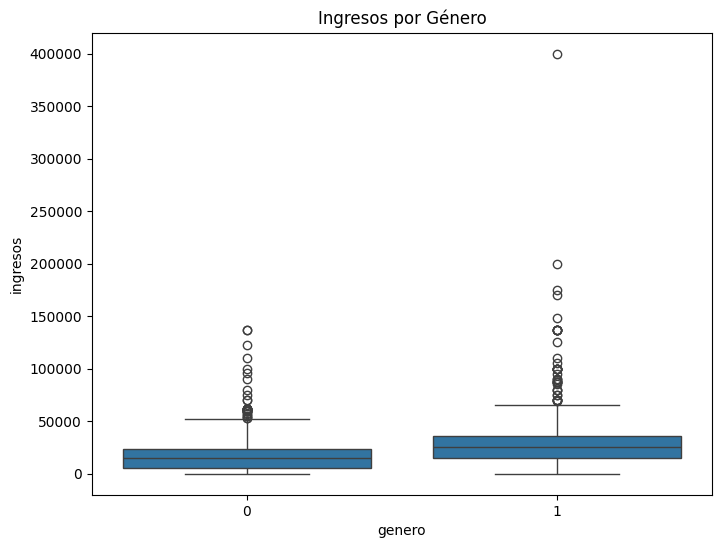

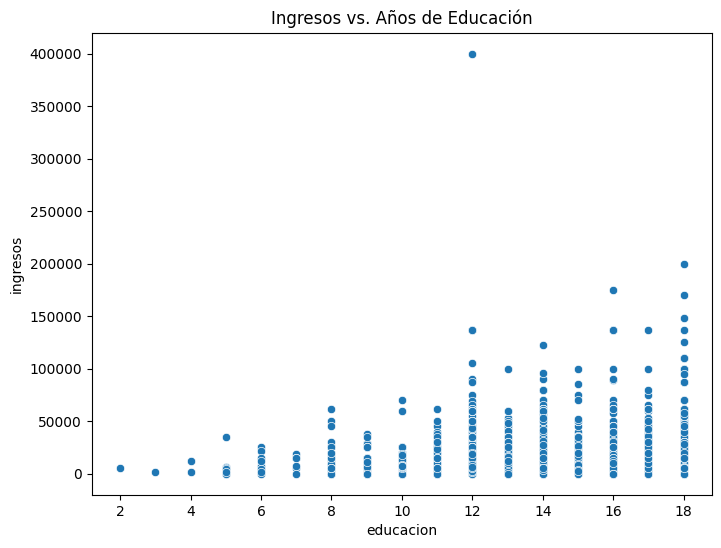

In [12]:
# Boxplot ingresos vs. género
plt.figure(figsize=(8, 6))
sns.boxplot(x='genero', y='ingresos', data=df)
plt.title("Ingresos por Género")
plt.show()

# Scatterplot ingresos vs. educación
plt.figure(figsize=(8, 6))
sns.scatterplot(x='educacion', y='ingresos', data=df)
plt.title("Ingresos vs. Años de Educación")
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

#columnas numéricas para PCA
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# Escalar
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Verificando
print("Forma del dataset escalado:", df_scaled.shape)


Forma del dataset escalado: (1816, 13)


In [14]:
from sklearn.decomposition import PCA

# PCA y ajuste de modelo
pca = PCA()
pca.fit(df_scaled)

# proporción de varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# varianza explicada acumulada
cumulative_variance = explained_variance.cumsum()
print("Varianza explicada acumulada por los componentes principales:")
print(cumulative_variance)


Varianza explicada acumulada por los componentes principales:
[0.22743562 0.40216015 0.55458159 0.65205899 0.732521   0.80535673
 0.86819615 0.91186969 0.94719392 0.97647654 0.9973493  1.
 1.        ]


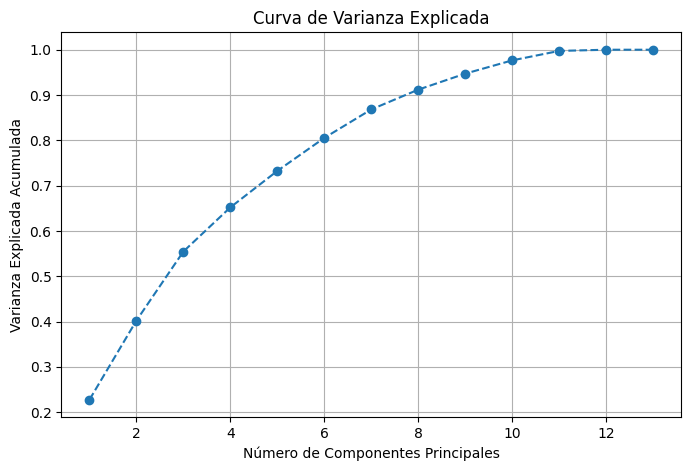

In [15]:
# Visualizar varianza
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Curva de Varianza Explicada')
plt.grid()
plt.show()


In [16]:
# número de componentes principales para explicar al menos el 95% de la varianza
n_components = next(i for i, total_var in enumerate(cumulative_variance) if total_var >= 0.95) + 1

# Aplicación PCA con el número seleccionado
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

print(f"El dataset ha sido reducido a {n_components} componentes principales.")
print("Nueva forma del dataset reducido:", df_pca.shape)


El dataset ha sido reducido a 10 componentes principales.
Nueva forma del dataset reducido: (1816, 10)


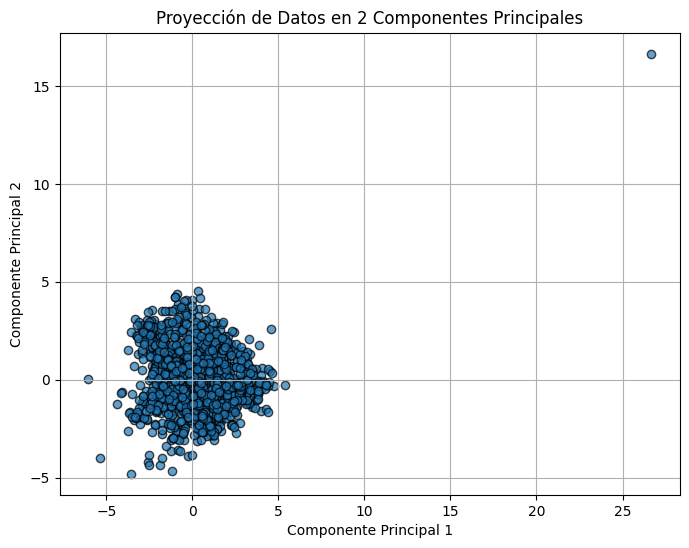

In [17]:
# Reducir a 2 componentes
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_scaled)

# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_2d[:, 0], df_pca_2d[:, 1], alpha=0.7, edgecolor='k')
plt.title("Proyección de Datos en 2 Componentes Principales")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid()
plt.show()
